In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('loan_approval_data.csv')
df.drop('ApplicantID',axis=1,inplace=True)

In [11]:
label  = LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i] = label.fit_transform(df[i])
df

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,3,0,1,11435,3655,699,180,1,2,0
1,0,0,2,1,1,6998,7938,164,300,1,2,1
2,1,1,1,0,0,2162,9101,283,240,1,0,0
3,1,1,0,0,1,3974,187,589,180,1,2,0
4,1,0,3,0,1,21675,5409,60,360,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,0,3,1,0,10605,4733,220,300,1,2,1
796,1,0,3,1,0,4014,7081,208,120,0,1,0
797,1,1,2,0,0,3381,8690,250,360,1,0,1
798,1,0,2,0,0,3098,7117,536,120,1,0,0


In [12]:
X = df[['ApplicantIncome','LoanAmount']].values
y = df['Loan_Status'].values

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.32383185,  1.80423183],
       [-0.98523453, -1.13854537],
       [-1.70611426, -0.48398371],
       ...,
       [-1.52440368, -0.66550081],
       [-1.56658915,  0.90764737],
       [ 1.2227205 ,  1.29268364]], shape=(800, 2))

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=31)

kernel :LINEAR|| Accuracy:0.75


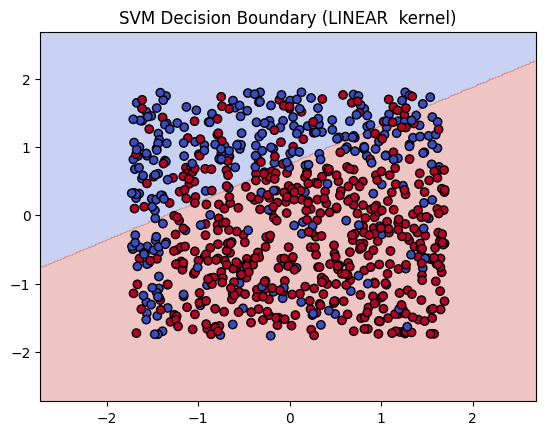

kernel :POLY|| Accuracy:0.75


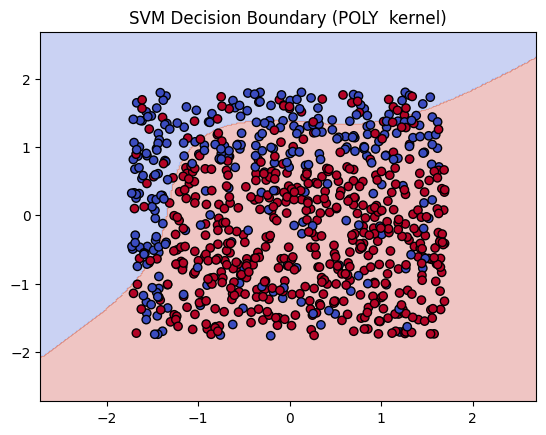

kernel :RBF|| Accuracy:0.80


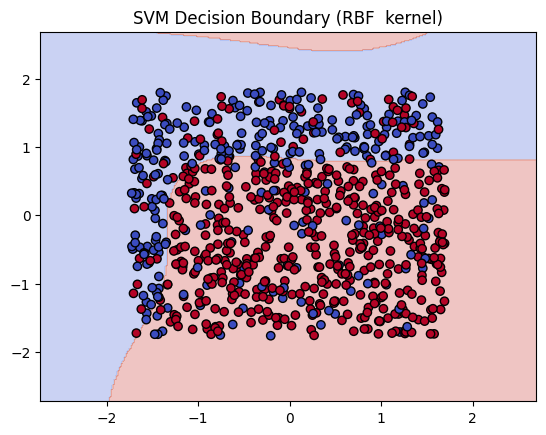

kernel :SIGMOID|| Accuracy:0.62


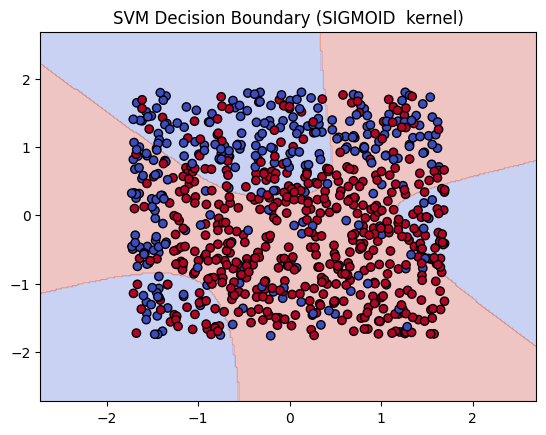

In [15]:
kernels = ['linear','poly','rbf','sigmoid']

for kernel in kernels:
    svm = SVC(kernel=kernel,degree =3,gamma='auto')
    svm.fit(X_train,y_train)

    acc = svm.score(X_test,y_test)
    print(f'kernel :{kernel.upper()}|| Accuracy:{acc:.2f}')
    


    plt.Figure(figsize=(6,5))
  
    plt.title(f'SVM Decision Boundary ({kernel.upper()}  kernel)')
    x_min,x_max = X_scaled[:,0].min()-1, X_scaled[:, 0].max()+1
    y_min,y_max = X_scaled[:,0].min()-1, X_scaled[:, 0].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,300),
                         np.linspace(y_min,y_max,300))
    
    Z = svm.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contourf(xx,yy,Z,alpha=0.3,cmap=plt.cm.coolwarm)
    plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y,cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()